In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Load iris dataset
iris_df = pd.read_csv("/content/iris (1).csv")

# Features and target
X_iris = iris_df.iloc[:, :-1]
y_iris = iris_df.iloc[:, -1]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_iris, y_iris, test_size=0.2, random_state=42)

# Train KNN
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(X_train, y_train)

# Predict
y_pred = knn_iris.predict(X_test)

# Evaluate
print("Iris Dataset - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Iris Dataset - Accuracy: 1.0
Confusion Matrix:
 [[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
Classification Report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [3]:
# Load diabetes dataset
diabetes_df = pd.read_csv("/content/diabetes.csv")

# Features and target
X_diabetes = diabetes_df.iloc[:, :-1]
y_diabetes = diabetes_df.iloc[:, -1]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_diabetes)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_diabetes, test_size=0.2, random_state=42)

# Train KNN
knn_diabetes = KNeighborsClassifier(n_neighbors=5)
knn_diabetes.fit(X_train, y_train)

# Predict
y_pred = knn_diabetes.predict(X_test)

# Evaluate
print("Diabetes Dataset - Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Diabetes Dataset - Accuracy: 0.6883116883116883
Confusion Matrix:
 [[79 20]
 [28 27]]
Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.80      0.77        99
           1       0.57      0.49      0.53        55

    accuracy                           0.69       154
   macro avg       0.66      0.64      0.65       154
weighted avg       0.68      0.69      0.68       154



Best K value: 6 with accuracy: 0.9344


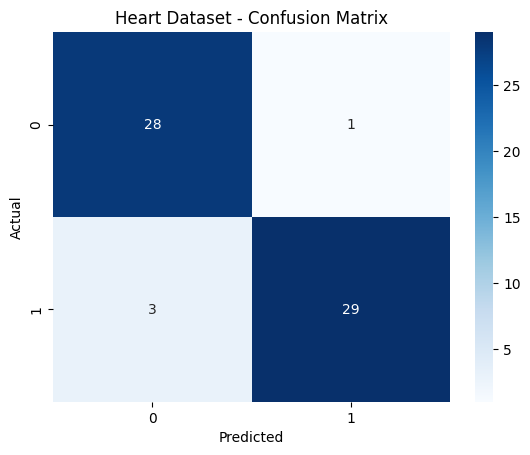

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93        29
           1       0.97      0.91      0.94        32

    accuracy                           0.93        61
   macro avg       0.93      0.94      0.93        61
weighted avg       0.94      0.93      0.93        61



In [4]:
# Load heart dataset
heart_df = pd.read_csv("heart.csv")

# Features and target
X_heart = heart_df.iloc[:, :-1]
y_heart = heart_df.iloc[:, -1]

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_heart)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_heart, test_size=0.2, random_state=42)

# Try different k values
best_score = 0
best_k = 1
for k in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    score = knn.score(X_test, y_test)
    if score > best_score:
        best_score = score
        best_k = k

print(f"Best K value: {best_k} with accuracy: {best_score:.4f}")

# Train best K model
knn_heart = KNeighborsClassifier(n_neighbors=best_k)
knn_heart.fit(X_train, y_train)
y_pred = knn_heart.predict(X_test)

# Plot confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap="Blues", fmt='g')
plt.title('Heart Dataset - Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print classification report
print("Classification Report:\n", classification_report(y_test, y_pred))
